In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
url = "https://docs.google.com/spreadsheets/d/1UgWa0hSXxldvyj5cX_L5ewyZIzPIAgwU/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,@teguhhadyanto,Komentar komentar buzzeRp seragam,2/12/24 21:26,1,0.0
1,@ngkimwarkiman5388,Semoga indonesia jangan hanya tinggal nama,2/12/24 21:26,0,0.0
2,@hermawanbasri117,"Tidak sadarkah diri yg memangku amanah, bahwa ...",2/12/24 21:26,0,0.0
3,@winarnijhonwinarnijhon.2018,Sore ini aku mendapatkan amplop dan nama calon...,2/12/24 21:26,0,0.0
4,@rizkifauzan4579,02🎉,2/12/24 21:26,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         65530 non-null  object 
 1   Comment      65529 non-null  object 
 2   Time         65535 non-null  object 
 3   Likes        65535 non-null  int64  
 4   Reply Count  47543 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [6]:
df["Comment"].isnull().sum()

6

In [9]:
df = df.dropna(subset=["Comment"])

In [10]:
df.isnull().sum()

Name               5
Comment            0
Time               0
Likes              0
Reply Count    17991
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,47534.0,4.673286,153.702105,0.0,0.0,0.0,1.0,29925.0
Reply Count,47534.0,0.424959,5.902410,0.0,0.0,0.0,0.0,750.0


In [11]:
df = df[["Comment"]]

In [12]:
df

,Comment
0,Komentar komentar buzzeRp seragam
1,Semoga indonesia jangan hanya tinggal nama
2,"Tidak sadarkah diri yg memangku amanah, bahwa ..."
3,Sore ini aku mendapatkan amplop dan nama calon...
4,02🎉
...,...
65530,Inilah kenapa indonesia menjadi bahan tawaan p...
65531,"Misal ini mah ya, kalo emang bener gibran mela..."
65532,Semoga cak nun diberikan kesehatan dan umur pa...
65533,"Fix 02 pakai cara curang, di planning dalam ja..."


C:\Users\acer\AppData\Local\Temp\ipykernel_20460\2039555839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_20460\2039555839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


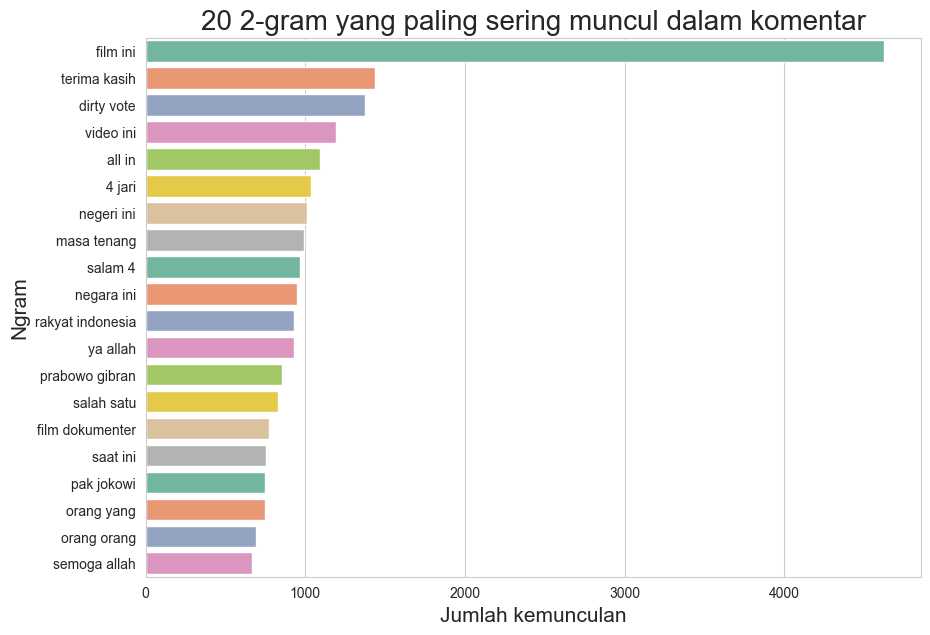

C:\Users\acer\AppData\Local\Temp\ipykernel_20460\2039555839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_20460\2039555839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


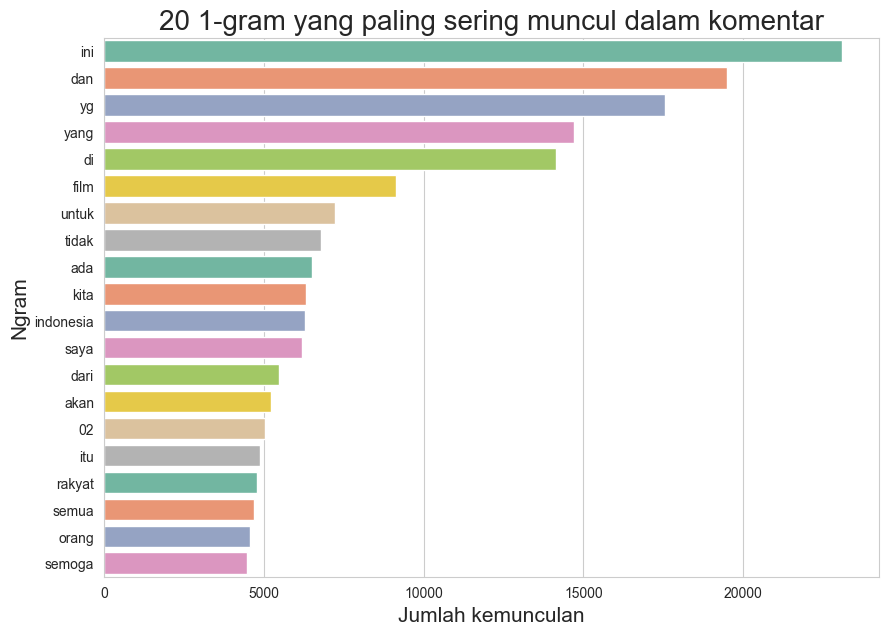

In [12]:
def plot_ngram(df, column, n=1, top_n=20):
    komentar = ' '.join(df[column].astype(str).str.lower())
    kata = re.findall(r'\b\w+\b', komentar)
    ngrams_list = list(ngrams(kata, n))
    ngram_freq = Counter(ngrams_list)
    ngram_freq_df = pd.DataFrame(list(ngram_freq.items()), columns=['Ngram', 'Frekuensi'])
    ngram_freq_df = ngram_freq_df.sort_values(by='Frekuensi', ascending=False)
    top_ngrams = ngram_freq_df.head(top_n)
    top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,7))
    sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")
    plt.xlabel('Jumlah kemunculan', fontsize=15)
    plt.ylabel('Ngram', fontsize=15)
    plt.title(f'{top_n} {n}-gram yang paling sering muncul dalam komentar', fontsize=20)
    plt.show()
plot_ngram(df, 'Comment', n=2, top_n=20)
plot_ngram(df, 'Comment', n=1, top_n=20)

In [13]:
data = df

In [14]:
data["token"] = data["Comment"].apply(lambda x: word_tokenize(str(x).lower()))

In [15]:
data

,Comment,token
0,Komentar komentar buzzeRp seragam,"[komentar, komentar, buzzerp, seragam]"
1,Semoga indonesia jangan hanya tinggal nama,"[semoga, indonesia, jangan, hanya, tinggal, nama]"
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...","[tidak, sadarkah, diri, yg, memangku, amanah, ..."
3,Sore ini aku mendapatkan amplop dan nama calon...,"[sore, ini, aku, mendapatkan, amplop, dan, nam..."
4,02🎉,[02🎉]
...,...,...
65530,Inilah kenapa indonesia menjadi bahan tawaan p...,"[inilah, kenapa, indonesia, menjadi, bahan, ta..."
65531,"Misal ini mah ya, kalo emang bener gibran mela...","[misal, ini, mah, ya, ,, kalo, emang, bener, g..."
65532,Semoga cak nun diberikan kesehatan dan umur pa...,"[semoga, cak, nun, diberikan, kesehatan, dan, ..."
65533,"Fix 02 pakai cara curang, di planning dalam ja...","[fix, 02, pakai, cara, curang, ,, di, planning..."


In [16]:
words_freq = Counter(data["token"].sum())

In [17]:
bigram_freq = Counter(list(ngrams(data["token"].sum(), 2)))

In [18]:
print("Frekuensi Kata:")
print(words_freq.most_common(100))
print("\nFrekuensi Bigram:")
print(bigram_freq.most_common(100))

Frekuensi Kata:
[(',', 40417), ('.', 25660), ('ini', 22683), ('dan', 19440), ('yg', 17520), ('yang', 14666), ('di', 14082), ('..', 9178), ('?', 9084), ('film', 9070), ('...', 7520), ('untuk', 7233), ('tidak', 6763), ('!', 6698), ('ada', 6475), ('kita', 6281), ('indonesia', 6200), ('saya', 6122), ('dari', 5462), ('akan', 5202), ('itu', 4849), ('rakyat', 4722), ('semua', 4649), ('02', 4433), ('dengan', 4410), ('semoga', 4398), ('bisa', 4397), ('sudah', 4206), ('orang', 4000), ('nya', 3961), ('kalian', 3895), ('ya', 3870), ('negara', 3868), ('mereka', 3841), ('jokowi', 3646), ('allah', 3622), ('paslon', 3489), ('demokrasi', 3323), ('jadi', 3127), ('pemilu', 3110), ('politik', 2923), ('tapi', 2894), ('dalam', 2824), ('hanya', 2709), ('apa', 2667), ("''", 2666), ('mau', 2660), ('prabowo', 2593), ('presiden', 2560), ('juga', 2549), ('ga', 2479), ('banyak', 2450), ('gak', 2448), ('....', 2404), ('baik', 2370), ('bukan', 2347), ('buat', 2328), ('ke', 2258), ('karena', 2215), ('lebih', 2190), (

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.corpus import stopwords
additional_stopwords = [
    ',',
    '.',
    'ini',
    'dan',
    'yg',
    'di',
    'yang',
    '?',
    '@',
    '..',
    '...',
    '!',
    'ya',
    'nya',
    'ga',
    'gak',
    "''",
    '....',
    'kalo',
    'tau',
    '``',
    'kan',
    ')',
    'lah',
    '&',
    'kok',
    '(',
    ':',
    'in',
    'lu',
    '😂',
    'karna',
    'all',
    'tdk',
    'klo',
    'sih',
    'utk',
    'dgn',
    'tp',
    '#',
    'gk',
    'aja',
    'jg',
    'sy',
    ']'
]

stopwords_indonesian = set(stopwords.words('indonesian')).union(set(additional_stopwords))
print(list(stopwords_indonesian)[:20])

['tiba', 'ditambahkan', 'pihaknya', 'kedua', 'kalo', 'amatlah', 'beginian', 'tentang', 'namun', 'memperbuat', 'mengucapkannya', 'diberikannya', 'segalanya', 'bertutur', 'amat', 'menjelaskan', 'diakhiri', 'apakah', 'aja', 'itulah']


In [22]:
with open('stopwords.txt', 'w', encoding='utf-8') as f:
    for stopword in stopwords_indonesian:
        f.write(stopword + '\n')

In [24]:
with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()
print(type(stopwords))

<class 'list'>


In [27]:
stopwords.remove('akhyar')

In [28]:
def checkingStopword(text): return True if text in stopwords else False

print(checkingStopword("akhyar"))

False


In [29]:
stopwords.remove('tidak')

In [13]:
df

,Comment
0,Komentar komentar buzzeRp seragam
1,Semoga indonesia jangan hanya tinggal nama
2,"Tidak sadarkah diri yg memangku amanah, bahwa ..."
3,Sore ini aku mendapatkan amplop dan nama calon...
4,02🎉
...,...
65530,Inilah kenapa indonesia menjadi bahan tawaan p...
65531,"Misal ini mah ya, kalo emang bener gibran mela..."
65532,Semoga cak nun diberikan kesehatan dan umur pa...
65533,"Fix 02 pakai cara curang, di planning dalam ja..."


In [14]:
df.isna().sum()

Comment    0
dtype: int64

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df["Comment"])

print("Dimensi vektor TF-IDF:", tfidf_vectors.shape)

Dimensi vektor TF-IDF: (65529, 51038)


In [17]:
pca = TruncatedSVD(n_components=100)
vectors_2d = pca.fit_transform(tfidf_vectors)

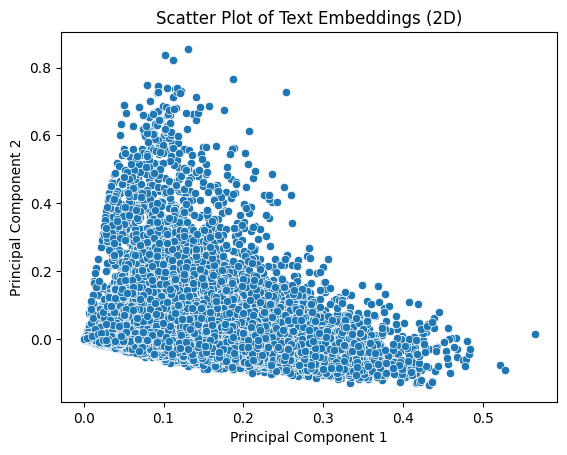

In [18]:
sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of Text Embeddings (2D)")
plt.show()

In [19]:
# save df to csv
df.to_csv('data_nlp_uas.csv', index=False)